<a href="https://colab.research.google.com/github/Sebas-gifPaz777/AI_2_nn_model/blob/main/LR_NN_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from keras.utils import image_dataset_from_directory
import os
import h5py
%matplotlib inline

In [3]:
def data_uploading(path,num):
  dataset = []
  i = 0
  for file in os.listdir(path):
    ruta = os.path.join(path, file)
    if i<=num:
      try:
        with Image.open(ruta) as img:
          img = img.resize((64,64))
          dataset.append(img)
        i+=1
      except Exception as e:
          print(f"Error processing image {file}: {e}")
    else:
      return dataset


In [4]:
def shuffle_dataset(train_dog, train_cat, dog, cat, dog_class, cat_class):
  train_x_origin = train_dog + train_cat
  train_y_origin = dog + cat
  train_classes = dog_class + cat_class
  suffleable = [i for i in range(len(train_x_origin))]
  random.shuffle(suffleable)
  print(suffleable)

  train_x =[]
  train_y= []
  train_c=[]
  for i in range(len(suffleable)):
    train_x.append(train_x_origin[suffleable[i]])
    train_y.append(train_y_origin[suffleable[i]])
    train_c.append(train_classes[suffleable[i]])
  return train_x, train_y, train_c

In [5]:
# Dataset:  https://drive.google.com/drive/folders/1FvFL0fpEppXAoPbaMRDPTxZOrVXHd-kv?usp=sharing
import random
def load_dataset():

    # Uploading training data
    train_dog = data_uploading('drive/MyDrive/datasets/Dog_Cat/training_set/training_set/dogs',2000)
    dog = [0]*len(train_dog)
    dog_class = ["dog"]*len(train_dog)

    train_cat = data_uploading('drive/MyDrive/datasets/Dog_Cat/training_set/training_set/cats',2000)
    cat = [1]*len(train_cat)
    cat_class = ["cat"]*len(train_dog)

    # Uploading test data
    test_dog = data_uploading('drive/MyDrive/datasets/Dog_Cat/test_set/test_set/dogs',502)
    dog_data = [0]*len(test_dog)
    dog_data_class = ["dog"]*len(test_dog)
    test_cat = data_uploading('drive/MyDrive/datasets/Dog_Cat/test_set/test_set/cats',502)
    cat_data = [1]*len(test_cat)
    cat_data_class = ["cat"]*len(test_cat)

    #Shuffle training dataset
    train_x_origin, train_y_origin, train_classes=shuffle_dataset(train_dog, train_cat, dog, cat, dog_class, cat_class)
    plt.imshow(train_x_origin[2])
    print(str(train_y_origin[2]))
    print(train_classes[2])


    #Shuffle test dataset
    test_x_origin, test_y_origin, test_classes = shuffle_dataset(test_dog, test_cat, dog_data, cat_data, dog_data_class, cat_data_class)
    plt.imshow(test_x_origin[2])
    print(str(test_y_origin[2]))
    print(test_classes[2])

    #Transform to numpy array
    train_x_origin = np.array(train_x_origin)
    test_x_origin = np.array(test_x_origin)
    train_y_origin = np.array(train_y_origin)
    test_y_origin = np.array(test_y_origin)


    #Reshape y_hat dataset
    train_y_origin =  train_y_origin.reshape((1,train_y_origin.shape[0]))
    test_y_origin =  test_y_origin.reshape((1,test_y_origin.shape[0]))
    print(str(train_y_origin.shape) + "that's the shape")
    print(str(test_y_origin.shape) + "that's the shape of test")

    return train_x_origin, train_y_origin, train_classes, test_x_origin, test_y_origin


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


[2726, 950, 996, 1288, 2333, 368, 2132, 1897, 3533, 3017, 679, 2903, 1423, 2402, 1541, 1650, 3182, 2911, 3373, 1654, 2957, 3947, 3733, 1768, 1649, 1814, 3384, 3648, 1482, 3187, 3640, 3759, 3454, 2111, 3854, 1321, 3712, 3119, 333, 577, 21, 80, 1334, 3113, 843, 2481, 1073, 3472, 1011, 3728, 585, 3551, 2865, 2730, 1470, 1777, 3160, 1206, 881, 2944, 1604, 1074, 685, 1758, 3760, 2901, 2421, 3198, 1157, 1268, 885, 1770, 2298, 1175, 632, 1075, 2189, 1395, 1266, 779, 1493, 1110, 1994, 1765, 339, 2327, 834, 719, 3340, 639, 3731, 3901, 1983, 1653, 3510, 3172, 2807, 645, 587, 3358, 736, 2669, 118, 2873, 493, 1579, 84, 3964, 340, 41, 1119, 634, 850, 1601, 3514, 1005, 1033, 857, 1059, 3542, 1643, 52, 2943, 1940, 1464, 933, 1727, 3388, 3518, 1435, 2757, 2976, 1854, 3818, 2220, 1858, 1701, 3338, 2857, 225, 2317, 2483, 428, 3427, 2289, 3241, 3007, 313, 902, 3399, 930, 3841, 2511, 1555, 2655, 1410, 1008, 1713, 48, 749, 211, 588, 2739, 2359, 3075, 3910, 2050, 3707, 3444, 3412, 875, 2775, 3111, 2337, 219

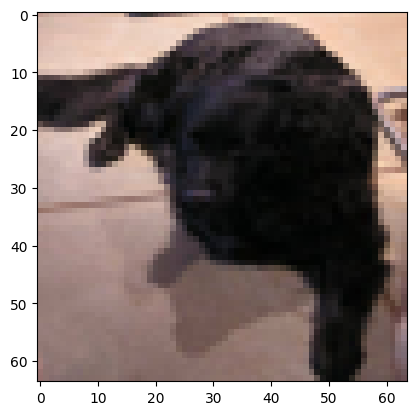

In [7]:
# Loading the data
train_x_origin, train_y_origin, train_classes, test_x_origin, test_y_origin = load_dataset()

class: cat, value: [1]


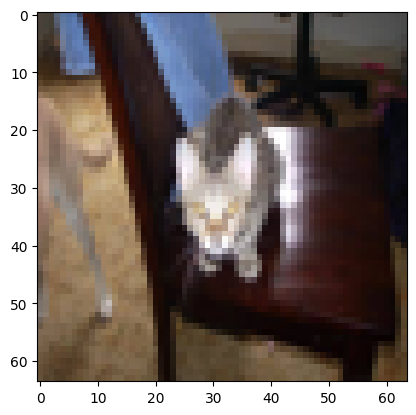

In [8]:
print("class: " + train_classes[0] + ", value: "+ str(train_y_origin[:,0]))
plt.imshow(train_x_origin[0])

In [9]:
train_x_origin.shape

(4002, 64, 64, 3)

In [10]:
### START CODE HERE ### (≈ 3 lines of code)
m_train = train_y_origin.shape[1]
m_test = test_y_origin.shape[1]
num_px = train_x_origin.shape[1]
### END CODE HERE ###

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_x_origin.shape))
print ("train_set_y shape: " + str(train_y_origin.shape))
print ("test_set_x shape: " + str(test_x_origin.shape))
print ("test_set_y shape: " + str(test_y_origin.shape))

Number of training examples: m_train = 4002
Number of testing examples: m_test = 1006
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (4002, 64, 64, 3)
train_set_y shape: (1, 4002)
test_set_x shape: (1006, 64, 64, 3)
test_set_y shape: (1, 1006)


In [11]:
# Reshape the training and test examples

### START CODE HERE ### (≈ 2 lines of code)
train_set_x_flatten = train_x_origin.reshape(train_x_origin.shape[0], -1).T
test_set_x_flatten = test_x_origin.reshape(test_x_origin.shape[0], -1).T
### END CODE HERE ###

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_y_origin.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_y_origin.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 4002)
train_set_y shape: (1, 4002)
test_set_x_flatten shape: (12288, 1006)
test_set_y shape: (1, 1006)
sanity check after reshaping: [74 65 58 69 65]


In [12]:
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

In [13]:
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    s = 1 / (1 + np.exp(-z))
    ### END CODE HERE ###

    return s

In [14]:
print ("sigmoid(0) = " + str(sigmoid(0)))
print ("sigmoid(9.2) = " + str(sigmoid(9.2)))

sigmoid(0) = 0.5
sigmoid(9.2) = 0.9998989708060922


In [15]:
# GRADED FUNCTION: initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.

    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)

    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    w = np.zeros(shape=(dim, 1))
    b = 0
    ### END CODE HERE ###

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))

    return w, b

In [16]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0


In [17]:
# GRADED FUNCTION: propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b

    Tips:
    - Write your code step by step for the propagation
    """

    m = X.shape[1]

    # FORWARD PROPAGATION (FROM X TO COST)
    ### START CODE HERE ### (≈ 2 lines of code)
    A = sigmoid(np.dot(w.T, X) + b)  # compute activation
    cost = (- 1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))  # compute cost
    ### END CODE HERE ###

    # BACKWARD PROPAGATION (TO FIND GRAD)
    ### START CODE HERE ### (≈ 2 lines of code)
    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y)
    ### END CODE HERE ###

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())

    grads = {"dw": dw,
             "db": db}

    return grads, cost

In [18]:
w, b, X, Y = np.array([[1], [2]]), 2, np.array([[1,2], [3,4]]), np.array([[1, 0]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99993216]
 [1.99980262]]
db = 0.49993523062470574
cost = 6.000064773192205


In [19]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps

    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.

    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """

    costs = []

    for i in range(num_iterations):


        # Cost and gradient calculation (≈ 1-4 lines of code)
        ### START CODE HERE ###
        grads, cost = propagate(w, b, X, Y)
        ### END CODE HERE ###

        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]

        # update rule (≈ 2 lines of code)
        ### START CODE HERE ###
        w = w - learning_rate * dw  # need to broadcast
        b = b - learning_rate * db
        ### END CODE HERE ###

        # Record the costs
        if i % 100 == 0:
            costs.append(cost)

        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs

In [20]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.1124579 ]
 [0.23106775]]
b = 1.5593049248448891
dw = [[0.90158428]
 [1.76250842]]
db = 0.4304620716786828


In [21]:
# GRADED FUNCTION: predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)

    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''

    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)

    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    ### START CODE HERE ### (≈ 1 line of code)
    A = sigmoid(np.dot(w.T, X) + b)
    ### END CODE HERE ###

    for i in range(A.shape[1]):
        # Convert probabilities a[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
        ### END CODE HERE ###

    assert(Y_prediction.shape == (1, m))

    return Y_prediction

In [22]:
print("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1.]]


In [23]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    """
    Builds the logistic regression model by calling the function you've implemented previously

    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations

    Returns:
    d -- dictionary containing information about the model.
    """

    ### START CODE HERE ###
    # initialize parameters with zeros (≈ 1 line of code)
    print("value to intialize: "+str(X_train.shape[0]))
    w, b = initialize_with_zeros(X_train.shape[0])
    print("w: "+str(w)+" b: "+str(b))

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)

    print(str(parameters)+","+str(grads)+","+str(costs))

    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    print("w: "+str(w)+" b: "+str(b))

    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    ### END CODE HERE ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))


    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train" : Y_prediction_train,
         "w" : w,
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}

    return d

In [30]:
d = model(train_set_x, train_y_origin, test_set_x, test_y_origin, num_iterations = 2000, learning_rate = 0.001, print_cost = True)

value to intialize: 12288
w: [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]] b: 0
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.680653
Cost after iteration 200: 0.674934
Cost after iteration 300: 0.670822
Cost after iteration 400: 0.667518
Cost after iteration 500: 0.664704
Cost after iteration 600: 0.662224
Cost after iteration 700: 0.659990
Cost after iteration 800: 0.657947
Cost after iteration 900: 0.656057
Cost after iteration 1000: 0.654295
Cost after iteration 1100: 0.652639
Cost after iteration 1200: 0.651073
Cost after iteration 1300: 0.649586
Cost after iteration 1400: 0.648167
Cost after iteration 1500: 0.646808
Cost after iteration 1600: 0.645503
Cost after iteration 1700: 0.644245
Cost after iteration 1800: 0.643029
Cost after iteration 1900: 0.641852
{'w': array([[ 0.00132582],
       [-0.0037566 ],
       [-0.00206837],
       ...,
       [-0.00425777],
       [-0.00801624],
       [-0.0015839 ]]), 'b': 0.003596460950986742},{'dw': array([[-0.00047982],
       [

Let's also plot the cost function and the gradients.

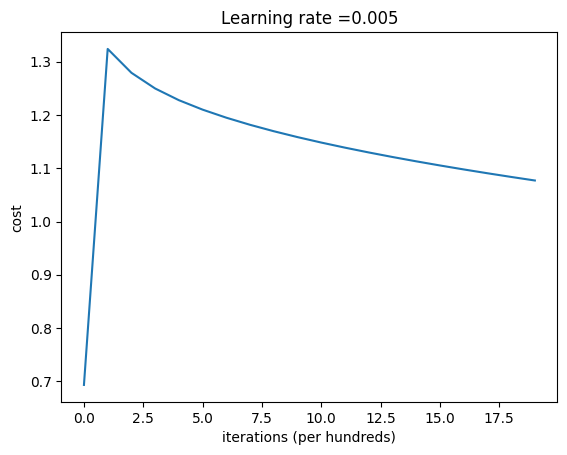

In [25]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

**Interpretation**:
You can see the cost decreasing. It shows that the parameters are being learned. However, you see that you could train the model even more on the training set. Try to increase the number of iterations in the cell above and rerun the cells. You might see that the training set accuracy goes up, but the test set accuracy goes down. This is called overfitting.

## 6 - Further analysis (optional/ungraded exercise) ##

Congratulations on building your first image classification model. Let's analyze it further, and examine possible choices for the learning rate $\alpha$.

#### Choice of learning rate ####

**Reminder**:
In order for Gradient Descent to work you must choose the learning rate wisely. The learning rate $\alpha$  determines how rapidly we update the parameters. If the learning rate is too large we may "overshoot" the optimal value. Similarly, if it is too small we will need too many iterations to converge to the best values. That's why it is crucial to use a well-tuned learning rate.

Let's compare the learning curve of our model with several choices of learning rates. Run the cell below. This should take about 1 minute. Feel free also to try different values than the three we have initialized the `learning_rates` variable to contain, and see what happens.

learning rate is: 0.003
value to intialize: 12288
w: [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]] b: 0
{'w': array([[ 0.00242629],
       [-0.00601565],
       [-0.00412078],
       ...,
       [-0.00907332],
       [-0.0146625 ],
       [-0.00415151]]), 'b': 0.008234098512677803},{'dw': array([[-0.000406  ],
       [ 0.0007462 ],
       [ 0.00074751],
       ...,
       [ 0.0018265 ],
       [ 0.00234258],
       [ 0.00100168]]), 'db': -0.0019064146476281071},[0.6931471805599453, 0.6708104465035093, 0.6622162912397627, 0.6560512261239253, 0.6510681756383948, 0.6468041342637477, 0.6430254843570051, 0.6395979175048068, 0.6364380531290849, 0.6334911416503808, 0.6307195197029465, 0.6280961900906846, 0.6256010713725335, 0.6232187221297445, 0.6209369151665884]
w: [[ 0.00242629]
 [-0.00601565]
 [-0.00412078]
 ...
 [-0.00907332]
 [-0.0146625 ]
 [-0.00415151]] b: 0.008234098512677803
train accuracy: 67.56621689155422 %
test accuracy: 60.735586481113316 %

-----------------------------------------

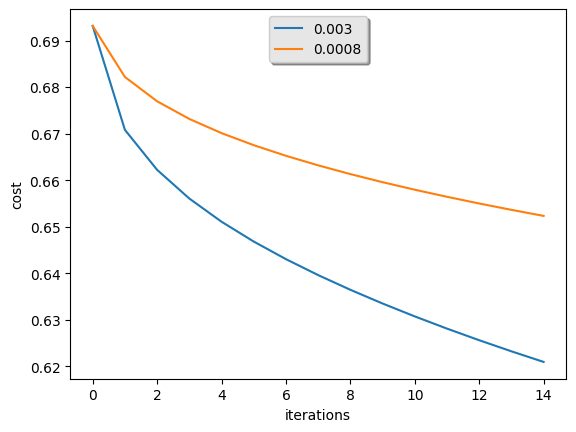

In [29]:
learning_rates = [0.003, 0.0008]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_y_origin, test_set_x, test_y_origin, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

**Interpretation**:
- Different learning rates give different costs and thus different predictions results.
- If the learning rate is too large (0.01), the cost may oscillate up and down. It may even diverge (though in this example, using 0.01 still eventually ends up at a good value for the cost).
- A lower cost doesn't mean a better model. You have to check if there is possibly overfitting. It happens when the training accuracy is a lot higher than the test accuracy.
- In deep learning, we usually recommend that you:
    - Choose the learning rate that better minimizes the cost function.
    - If your model overfits, use other techniques to reduce overfitting. (We'll talk about this in later videos.)
